In [1]:
import os
import csv
import tqdm
import pandas as pd
import numpy as np
from kloppy import statsbomb
from mplsoccer.pitch import Pitch
import matplotlib.pyplot as plt
from mplsoccer import Sbopen

## Shot data

In [2]:
shot_csv_lis = [i for i in os.listdir('./data') if i.endswith('.csv') & i.startswith('Shot')]
pass_csv_lis = [i for i in os.listdir('./data') if i.endswith('.csv') & i.startswith('Pass')]

In [3]:
csv_list = []
for i in shot_csv_lis:
    t_df = pd.read_csv('./data/{}'.format(i))
    csv_list.append(t_df)
df_shot = pd.concat(csv_list)

In [4]:
csv_list = []
for i in pass_csv_lis:
    t_df = pd.read_csv('./data/{}'.format(i))
    csv_list.append(t_df)
df_pass = pd.concat(csv_list)

In [5]:
df = pd.merge(left=df_shot, right=df_pass[['pass_assisted_shot_id', 'sub_type_name', 'pass_height_name']], how='left', left_on='id', right_on='pass_assisted_shot_id')

## EDA for goal event

In [7]:
len(df)

45773

In [8]:
df.head()

,Unnamed: 0,match_id,id,type_name,sub_type_name_x,player_name,team_name,body_part_name,outcome_name,x,y,shot_statsbomb_xg,pass_assisted_shot_id,sub_type_name_y,pass_height_name
0,131,18243,129d6ccd-ef7d-44e2-87e1-b55d018f5e24,Shot,Open Play,Jorge Resurrección Merodio,Atlético Madrid,Right Foot,Saved,108.0,52.0,0.069306,129d6ccd-ef7d-44e2-87e1-b55d018f5e24,NaN,High Pass
1,159,18243,855d5fee-a32c-4818-b5c8-9c98bb17bac5,Shot,Open Play,Karim Benzema,Real Madrid,Left Foot,Saved,115.0,41.0,0.418073,855d5fee-a32c-4818-b5c8-9c98bb17bac5,Free Kick,Low Pass
2,162,18243,f17c2cb5-cc03-4991-987c-fae2518a21c9,Shot,Open Play,Marcelo Vieira da Silva Júnior,Real Madrid,Left Foot,Off T,96.0,32.0,0.032653,NaN,NaN,NaN
3,300,18243,158ca4ad-9fd2-4f86-94f9-c711e4b2993f,Shot,Open Play,Toni Kroos,Real Madrid,Left Foot,Blocked,97.0,25.0,0.023983,158ca4ad-9fd2-4f86-94f9-c711e4b2993f,NaN,Ground Pass
4,499,18243,2bf5883e-1d85-4412-b1e9-9f03ff8dafa0,Shot,Open Play,Sergio Ramos García,Real Madrid,Left Foot,Goal,117.0,40.0,0.562398,2bf5883e-1d85-4412-b1e9-9f03ff8dafa0,NaN,High Pass


In [9]:
df.columns

Index(['Unnamed: 0', 'match_id', 'id', 'type_name', 'sub_type_name_x',
       'player_name', 'team_name', 'body_part_name', 'outcome_name', 'x', 'y',
       'shot_statsbomb_xg', 'pass_assisted_shot_id', 'sub_type_name_y',
       'pass_height_name'],
      dtype='object')

In [10]:
selected_columns = ['match_id', 'id', 'type_name', 'sub_type_name_x', 'player_name', 'team_name', 
            'body_part_name', 'outcome_name', 'x', 'y', 'shot_statsbomb_xg', 
            'sub_type_name_y', 'pass_height_name']

In [11]:
df = df[selected_columns]

In [12]:
df.head()

,match_id,id,type_name,sub_type_name_x,player_name,team_name,body_part_name,outcome_name,x,y,shot_statsbomb_xg,sub_type_name_y,pass_height_name
0,18243,129d6ccd-ef7d-44e2-87e1-b55d018f5e24,Shot,Open Play,Jorge Resurrección Merodio,Atlético Madrid,Right Foot,Saved,108.0,52.0,0.069306,NaN,High Pass
1,18243,855d5fee-a32c-4818-b5c8-9c98bb17bac5,Shot,Open Play,Karim Benzema,Real Madrid,Left Foot,Saved,115.0,41.0,0.418073,Free Kick,Low Pass
2,18243,f17c2cb5-cc03-4991-987c-fae2518a21c9,Shot,Open Play,Marcelo Vieira da Silva Júnior,Real Madrid,Left Foot,Off T,96.0,32.0,0.032653,NaN,NaN
3,18243,158ca4ad-9fd2-4f86-94f9-c711e4b2993f,Shot,Open Play,Toni Kroos,Real Madrid,Left Foot,Blocked,97.0,25.0,0.023983,NaN,Ground Pass
4,18243,2bf5883e-1d85-4412-b1e9-9f03ff8dafa0,Shot,Open Play,Sergio Ramos García,Real Madrid,Left Foot,Goal,117.0,40.0,0.562398,NaN,High Pass


In [13]:
df.columns = ['match_id', 'id', 'type', 'shot_type', 'player', 'team', 
            'body_part', 'outcome', 'x', 'y', 'shot_statsbomb_xg', 
            'pass_type', 'pass_height']

In [15]:
df.head()

,match_id,id,type,shot_type,player,team,body_part,outcome,x,y,shot_statsbomb_xg,pass_type,pass_height
0,18243,129d6ccd-ef7d-44e2-87e1-b55d018f5e24,Shot,Open Play,Jorge Resurrección Merodio,Atlético Madrid,Right Foot,Saved,108.0,52.0,0.069306,NaN,High Pass
1,18243,855d5fee-a32c-4818-b5c8-9c98bb17bac5,Shot,Open Play,Karim Benzema,Real Madrid,Left Foot,Saved,115.0,41.0,0.418073,Free Kick,Low Pass
2,18243,f17c2cb5-cc03-4991-987c-fae2518a21c9,Shot,Open Play,Marcelo Vieira da Silva Júnior,Real Madrid,Left Foot,Off T,96.0,32.0,0.032653,NaN,NaN
3,18243,158ca4ad-9fd2-4f86-94f9-c711e4b2993f,Shot,Open Play,Toni Kroos,Real Madrid,Left Foot,Blocked,97.0,25.0,0.023983,NaN,Ground Pass
4,18243,2bf5883e-1d85-4412-b1e9-9f03ff8dafa0,Shot,Open Play,Sergio Ramos García,Real Madrid,Left Foot,Goal,117.0,40.0,0.562398,NaN,High Pass


In [43]:
t_shot = df[df['outcome']=='Goal'].iloc[0,:]

In [45]:
match_id = t_shot['match_id']
print(match_id)
event_id = t_shot['id']
print(event_id)

18243
2bf5883e-1d85-4412-b1e9-9f03ff8dafa0


In [46]:
parser = Sbopen()
_, _, freeze, _ = parser.event(match_id)

In [47]:
freeze.head()
t_freeze = freeze[freeze['id'] == event_id]

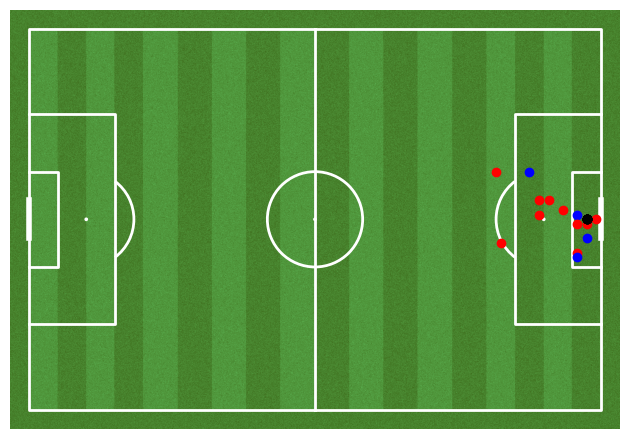

In [50]:
pitch = Pitch(pitch_color='grass', line_zorder=1, line_color='white', pitch_type="statsbomb", stripe=True)
fig, ax = pitch.draw()
for i in range(len(t_freeze)):
    if t_freeze.iloc[i,:]['teammate'] == False:
        color = 'red'
    else :
        color = 'blue'
    plt.scatter(x = t_freeze.iloc[i,:]['x'], y = t_freeze.iloc[i,:]['y'], color = color)
    plt.scatter(x = t_shot['x'], y = t_shot['y'], color = 'black')

In [51]:
t_freeze

,teammate,match_id,id,x,y,player_id,player_name,position_id,position_name,event_freeze_id
60,True,18243,2bf5883e-1d85-4412-b1e9-9f03ff8dafa0,115.0,39.0,19677,Karim Benzema,23,Center Forward,1
61,True,18243,2bf5883e-1d85-4412-b1e9-9f03ff8dafa0,105.0,30.0,6399,Gareth Frank Bale,17,Right Wing,2
62,True,18243,2bf5883e-1d85-4412-b1e9-9f03ff8dafa0,117.0,44.0,5207,Cristiano Ronaldo dos Santos Aveiro,21,Left Wing,3
63,False,18243,2bf5883e-1d85-4412-b1e9-9f03ff8dafa0,99.0,45.0,5199,Jorge Resurrección Merodio,16,Left Midfield,4
64,False,18243,2bf5883e-1d85-4412-b1e9-9f03ff8dafa0,107.0,39.0,6384,Gabriel Fernández Arenas,9,Right Defensive Midfield,5
65,False,18243,2bf5883e-1d85-4412-b1e9-9f03ff8dafa0,119.0,40.0,6378,Jan Oblak,1,Goalkeeper,6
66,False,18243,2bf5883e-1d85-4412-b1e9-9f03ff8dafa0,112.0,38.0,6381,Saúl Ñíguez Esclapez,12,Right Midfield,7
67,False,18243,2bf5883e-1d85-4412-b1e9-9f03ff8dafa0,109.0,36.0,6320,Filipe Luís Kasmirski,6,Left Back,8
68,False,18243,2bf5883e-1d85-4412-b1e9-9f03ff8dafa0,107.0,36.0,6382,Fernando José Torres Sanz,22,Right Center Forward,9
69,False,18243,2bf5883e-1d85-4412-b1e9-9f03ff8dafa0,117.0,41.0,6376,Stefan Savić,3,Right Center Back,10


In [41]:
t_shot

match_id                                            18243
id                   129d6ccd-ef7d-44e2-87e1-b55d018f5e24
type                                                 Shot
shot_type                                       Open Play
player                         Jorge Resurrección Merodio
team                                      Atlético Madrid
body_part                                      Right Foot
outcome                                             Saved
x                                                   108.0
y                                                    52.0
shot_statsbomb_xg                                0.069306
pass_type                                             NaN
pass_height                                     High Pass
Name: 0, dtype: object

In [36]:
df

,match_id,id,type,shot_type,player,team,body_part,outcome,x,y,shot_statsbomb_xg,pass_type,pass_height
0,18243,129d6ccd-ef7d-44e2-87e1-b55d018f5e24,Shot,Open Play,Jorge Resurrección Merodio,Atlético Madrid,Right Foot,Saved,108.0,52.0,0.069306,NaN,High Pass
1,18243,855d5fee-a32c-4818-b5c8-9c98bb17bac5,Shot,Open Play,Karim Benzema,Real Madrid,Left Foot,Saved,115.0,41.0,0.418073,Free Kick,Low Pass
2,18243,f17c2cb5-cc03-4991-987c-fae2518a21c9,Shot,Open Play,Marcelo Vieira da Silva Júnior,Real Madrid,Left Foot,Off T,96.0,32.0,0.032653,NaN,NaN
3,18243,158ca4ad-9fd2-4f86-94f9-c711e4b2993f,Shot,Open Play,Toni Kroos,Real Madrid,Left Foot,Blocked,97.0,25.0,0.023983,NaN,Ground Pass
4,18243,2bf5883e-1d85-4412-b1e9-9f03ff8dafa0,Shot,Open Play,Sergio Ramos García,Real Madrid,Left Foot,Goal,117.0,40.0,0.562398,NaN,High Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45768,3890259,771fb93c-9f8a-4aae-978c-39bee95b7cf1,Shot,Open Play,Thomas Müller,Bayern Munich,Left Foot,Goal,113.6,30.4,0.248334,NaN,Ground Pass
45769,3890259,21d1b0e1-4131-49a3-b0e0-2f38fafd4147,Shot,Open Play,David Olatukunbo Alaba,Bayern Munich,Left Foot,Saved,99.2,25.5,0.028587,NaN,Ground Pass
45770,3890259,6a80fdad-e1da-42d5-adfe-855664f36622,Shot,Open Play,Douglas Costa de Souza,Bayern Munich,Left Foot,Off T,106.5,64.6,0.007272,NaN,High Pass
45771,3890259,a75af5cb-a837-44b3-8d15-9251b11d3d4a,Shot,Open Play,Douglas Costa de Souza,Bayern Munich,Left Foot,Goal,100.7,57.0,0.025284,NaN,NaN


In [34]:
t_shot

match_id                                            18243
id                   129d6ccd-ef7d-44e2-87e1-b55d018f5e24
type                                                 Shot
shot_type                                       Open Play
player                         Jorge Resurrección Merodio
team                                      Atlético Madrid
body_part                                      Right Foot
outcome                                             Saved
x                                                   108.0
y                                                    52.0
shot_statsbomb_xg                                0.069306
pass_type                                             NaN
pass_height                                     High Pass
Name: 0, dtype: object

In [33]:
t_freeze

,teammate,match_id,id,x,y,player_id,player_name,position_id,position_name,event_freeze_id
0,False,18243,129d6ccd-ef7d-44e2-87e1-b55d018f5e24,113.0,51.0,5201,Sergio Ramos García,5,Left Center Back,1
1,False,18243,129d6ccd-ef7d-44e2-87e1-b55d018f5e24,120.0,79.0,5552,Marcelo Vieira da Silva Júnior,6,Left Back,2
2,False,18243,129d6ccd-ef7d-44e2-87e1-b55d018f5e24,112.0,47.0,20016,Kléper Laveran Lima Ferreira,3,Right Center Back,3
3,False,18243,129d6ccd-ef7d-44e2-87e1-b55d018f5e24,119.0,43.0,5597,Keylor Navas Gamboa,1,Goalkeeper,4
4,False,18243,129d6ccd-ef7d-44e2-87e1-b55d018f5e24,103.0,47.0,6399,Gareth Frank Bale,17,Right Wing,5
5,False,18243,129d6ccd-ef7d-44e2-87e1-b55d018f5e24,103.0,64.0,5574,Toni Kroos,15,Left Center Midfield,6
6,False,18243,129d6ccd-ef7d-44e2-87e1-b55d018f5e24,107.0,56.0,5463,Luka Modrić,13,Right Center Midfield,7
7,False,18243,129d6ccd-ef7d-44e2-87e1-b55d018f5e24,119.0,77.0,5539,Carlos Henrique Casimiro,10,Center Defensive Midfield,8
8,False,18243,129d6ccd-ef7d-44e2-87e1-b55d018f5e24,114.0,41.0,5721,Daniel Carvajal Ramos,2,Right Back,9
9,True,18243,129d6ccd-ef7d-44e2-87e1-b55d018f5e24,120.0,80.0,6381,Saúl Ñíguez Esclapez,12,Right Midfield,10


In [16]:
df.shot_type.value_counts()

Open Play    43138
Free Kick     2126
Penalty        496
Corner          13
Name: shot_type, dtype: int64

In [17]:
df.outcome.value_counts()

Off T               15103
Blocked             11308
Saved               10754
Goal                 4716
Wayward              2706
Post                  872
Saved Off Target      161
Saved to Post         153
Name: outcome, dtype: int64

In [18]:
df.body_part.value_counts()

Right Foot    23860
Left Foot     14276
Head           7526
Other           111
Name: body_part, dtype: int64

In [19]:
df.shot_statsbomb_xg.sum()

4590.0695984463

<Axes: >

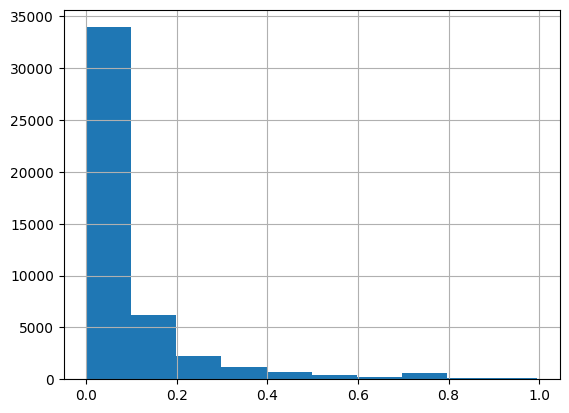

In [20]:
df.shot_statsbomb_xg.hist()

## coordinates of goal events

(array([7.0000e+00, 1.5000e+01, 3.4000e+01, 4.7000e+01, 1.1100e+02,
        1.0480e+03, 7.2350e+03, 1.2271e+04, 1.6766e+04, 8.2390e+03]),
 array([ 35.4,  43.9,  52.4,  60.9,  69.4,  77.9,  86.4,  94.9, 103.4,
        111.9, 120.4]),
 <BarContainer object of 10 artists>)

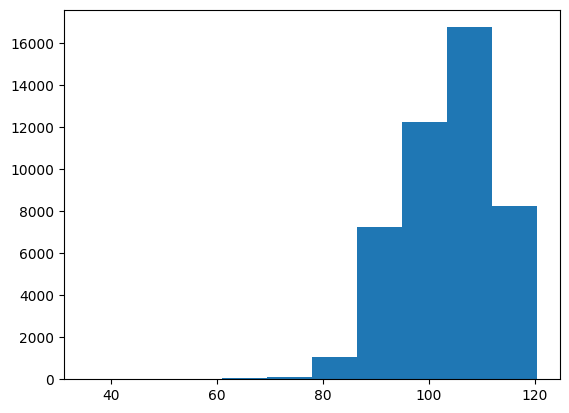

In [21]:
plt.hist(df['x'])

(array([   32.,   158.,  2476.,  8389., 12652., 11942.,  7955.,  2049.,
           82.,    38.]),
 array([ 0.3 ,  8.27, 16.24, 24.21, 32.18, 40.15, 48.12, 56.09, 64.06,
        72.03, 80.  ]),
 <BarContainer object of 10 artists>)

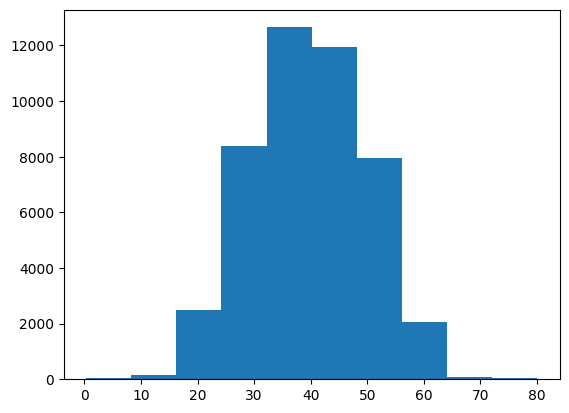

In [22]:
plt.hist(df['y'])

In [23]:
## sample 10 goals
np.random.seed(1)
sample_idx = np.random.choice(range(len(df)), size=50)

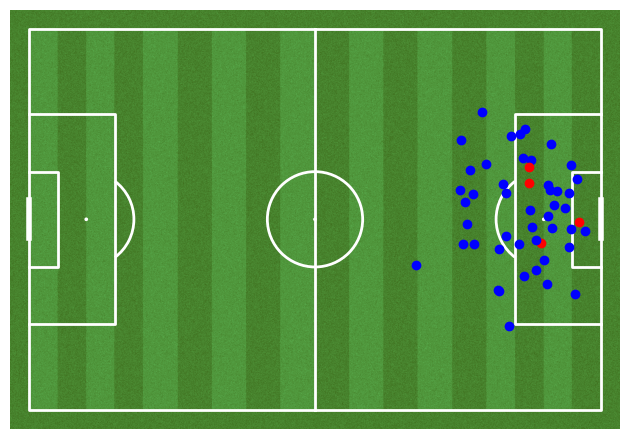

In [24]:
pitch = Pitch(pitch_color='grass', line_zorder=1, line_color='white', pitch_type="statsbomb", stripe=True)
fig, ax = pitch.draw()
for i in sample_idx:
    if df.iloc[i]['outcome'] == 'Goal':
        col = 'red'
    else :
        col = 'blue'
    ax.scatter(df.iloc[i]['x'], df.iloc[i]['y'], color = col)

### Distance from goal line and on-target angle
- statsbomb pitch size (120, 80)
- goal post size (w, h) = (7.32, 2.44)
- goal post point (x1, y1), (x2, y2) = (120, 43.66), (120, 36.34)

In [25]:
def distance(points):
    output = np.sqrt(((np.array([120, 40]) - points)**2).sum(axis=1))
    return output
def on_target_angle(points):
    c = 7.32
    a = np.sqrt(((np.array([120, 43.66]) - points)**2).sum(axis=1))
    b = np.sqrt(((np.array([120, 36.34]) - points)**2).sum(axis=1))
    cos_theta = (a**2 + b**2 - c**2)/(2 * a * b + 10e-10)
    theta = np.arccos(cos_theta)
    return theta 


In [26]:
shot_points = pd.concat([df['x'], df['y']], axis=1).values
df['shot_distance'] = distance(shot_points)
df['shot_angle'] = on_target_angle(shot_points)
df['success'] = [1 if i=='Goal' else 0 for i in df['outcome']]
numeric_columns = ['success', 'shot_distance', 'shot_angle']
categorical_columns = ['body_part', 'shot_type', 'pass_height', 'pass_type']
dt = pd.concat([df.loc[:,df.columns.isin(numeric_columns)],pd.get_dummies(df[categorical_columns])], axis=1)

In [27]:
dt.head()

,shot_distance,shot_angle,success,body_part_Head,body_part_Left Foot,body_part_Other,body_part_Right Foot,shot_type_Corner,shot_type_Free Kick,shot_type_Open Play,...,pass_height_Ground Pass,pass_height_High Pass,pass_height_Low Pass,pass_type_Corner,pass_type_Free Kick,pass_type_Goal Kick,pass_type_Interception,pass_type_Kick Off,pass_type_Recovery,pass_type_Throw-in
0,16.970563,0.309593,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,5.099020,1.239135,0,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
2,25.298221,0.273350,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,27.459060,0.223529,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,3.000000,1.768350,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [28]:
df['outcome'].value_counts()

Off T               15103
Blocked             11308
Saved               10754
Goal                 4716
Wayward              2706
Post                  872
Saved Off Target      161
Saved to Post         153
Name: outcome, dtype: int64

In [29]:
df.body_part.value_counts()

Right Foot    23860
Left Foot     14276
Head           7526
Other           111
Name: body_part, dtype: int64

In [30]:
df.shot_type.value_counts()

Open Play    43138
Free Kick     2126
Penalty        496
Corner          13
Name: shot_type, dtype: int64

In [31]:
df.pass_height.value_counts()

Ground Pass    16736
High Pass      12105
Low Pass        3801
Name: pass_height, dtype: int64

In [32]:
df.pass_type.value_counts()

Corner          3148
Free Kick       1687
Recovery        1656
Throw-in         271
Interception      60
Goal Kick         16
Kick Off           4
Name: pass_type, dtype: int64

In [33]:
dt.columns

Index(['shot_distance', 'shot_angle', 'success', 'body_part_Head',
       'body_part_Left Foot', 'body_part_Other', 'body_part_Right Foot',
       'shot_type_Corner', 'shot_type_Free Kick', 'shot_type_Open Play',
       'shot_type_Penalty', 'pass_height_Ground Pass', 'pass_height_High Pass',
       'pass_height_Low Pass', 'pass_type_Corner', 'pass_type_Free Kick',
       'pass_type_Goal Kick', 'pass_type_Interception', 'pass_type_Kick Off',
       'pass_type_Recovery', 'pass_type_Throw-in'],
      dtype='object')

In [34]:
dt = dt[['success', 'shot_distance', 'shot_angle', 'body_part_Head',
       'body_part_Left Foot', 'body_part_Other',
       'body_part_Right Foot', 'shot_type_Free Kick',
       'shot_type_Penalty', 'pass_height_Ground Pass',
       'pass_height_High Pass', 'pass_height_Low Pass',
       'pass_type_Corner', 'pass_type_Free Kick']]

In [35]:
dt.head()

,success,shot_distance,shot_angle,body_part_Head,body_part_Left Foot,body_part_Other,body_part_Right Foot,shot_type_Free Kick,shot_type_Penalty,pass_height_Ground Pass,pass_height_High Pass,pass_height_Low Pass,pass_type_Corner,pass_type_Free Kick
0,0,16.970563,0.309593,0,0,0,1,0,0,0,1,0,0,0
1,0,5.099020,1.239135,0,1,0,0,0,0,0,0,1,0,1
2,0,25.298221,0.273350,0,1,0,0,0,0,0,0,0,0,0
3,0,27.459060,0.223529,0,1,0,0,0,0,1,0,0,0,0
4,1,3.000000,1.768350,0,1,0,0,0,0,0,1,0,0,0


In [36]:
x = dt.loc[:, dt.columns != 'success'].values
y = dt['success'].values

#### logistic regression model

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [38]:
scaler = MinMaxScaler()
X = scaler.fit_transform(x)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [41]:
lr.score(X_train, y_train)

0.905538259872194

In [42]:
lr.score(X_test, y_test)

0.9060622610595304

#### Model validation

In [43]:
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import recall_score, precision_score

In [44]:
lr.score(X_test, y_test)

0.9060622610595304

In [45]:
coef_dict = pd.DataFrame(columns = dt.loc[:, dt.columns != 'success'].columns, data= lr.coef_).transpose()

In [46]:
np.exp(2.47)

11.822446851646363

In [47]:
coef_dict

,0
shot_distance,-9.779051
shot_angle,5.213936
body_part_Head,-0.682454
body_part_Left Foot,0.222211
body_part_Other,0.122994
body_part_Right Foot,0.319869
shot_type_Free Kick,1.023703
shot_type_Penalty,2.473718
pass_height_Ground Pass,0.288567
pass_height_High Pass,-0.092236


In [48]:
dt.loc[:, dt.columns != 'success'].columns

Index(['shot_distance', 'shot_angle', 'body_part_Head', 'body_part_Left Foot',
       'body_part_Other', 'body_part_Right Foot', 'shot_type_Free Kick',
       'shot_type_Penalty', 'pass_height_Ground Pass', 'pass_height_High Pass',
       'pass_height_Low Pass', 'pass_type_Corner', 'pass_type_Free Kick'],
      dtype='object')

In [49]:
'aa' + str(1)

'aa1'

In [50]:
lr.coef_

array([[-9.77905104,  5.21393579, -0.68245445,  0.22221094,  0.1229939 ,
         0.31986892,  1.02370269,  2.47371839,  0.28856694, -0.09223639,
        -0.09106503, -0.79690378, -0.20816021]])

In [51]:
recall_score(y_true= y_test, y_pred = lr.predict(X_test))

0.1539301310043668

In [52]:
np.random.seed(50)
sample_idx2 = np.random.choice(range(len(dt)), 100)
sample_x = X[sample_idx2,:]
sample_y = y[sample_idx2]
lr.predict(sample_x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [53]:
predicted_score = lr.decision_function(sample_x)

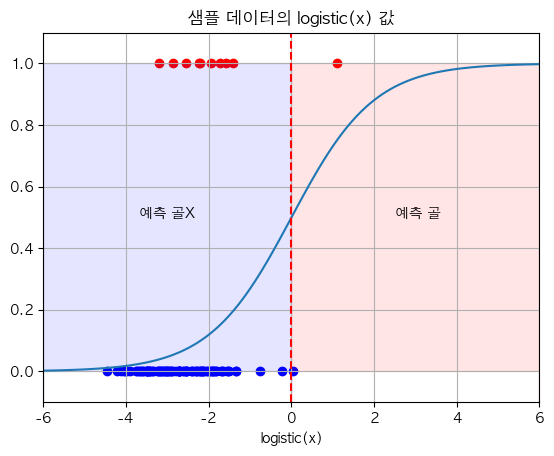

In [54]:
from scipy.special import expit
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
x_ = np.linspace(-6, 6, 121)
y_ = expit(x_)
plt.plot(x_, y_)
for i in range(len(sample_y)):
    if sample_y[i] == 1:
        color = 'red'
    else :
        color = 'blue'
    plt.scatter(predicted_score[i], sample_y[i], color = color)
plt.vlines(x=0, ymin=-0.1, ymax=1.1, linestyles='--', colors='red')
plt.grid()
plt.xlim(-6, 6)
plt.ylim(-0.1, 1.1)
plt.xlabel('logistic(x)')
plt.title('샘플 데이터의 logistic(x) 값')
plt.fill_between([0, 0, 6, 6], [-1, 1, 1, -1], alpha=0.1, color='red')
plt.text(x=2.5, y=0.5, s='예측 골')
plt.fill_between([0, 0, -6, -6], [-1, 1, 1, -1], alpha=0.1, color='blue')
plt.text(x=-3.7, y=0.5, s='예측 골X')
plt.show()

In [55]:
y_pred_proba = lr.predict_proba(X_test)[::,1]

#### Test-set goal probability distribution (every shots)

(array([6.148e+03, 1.908e+03, 5.160e+02, 2.070e+02, 1.310e+02, 6.900e+01,
        3.400e+01, 1.140e+02, 2.200e+01, 6.000e+00]),
 array([2.67784968e-05, 9.55155636e-02, 1.91004349e-01, 2.86493134e-01,
        3.81981919e-01, 4.77470704e-01, 5.72959489e-01, 6.68448274e-01,
        7.63937059e-01, 8.59425845e-01, 9.54914630e-01]),
 <BarContainer object of 10 artists>)

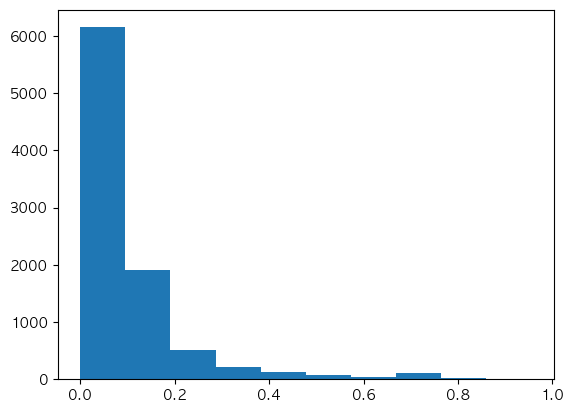

In [56]:
plt.hist(y_pred_proba)

#### Test-set goal probability distribution (only goals)

(array([261., 266., 119.,  63.,  56.,  25.,  17.,  87.,  17.,   5.]),
 array([0.00158019, 0.09691363, 0.19224708, 0.28758052, 0.38291397,
        0.47824741, 0.57358085, 0.6689143 , 0.76424774, 0.85958119,
        0.95491463]),
 <BarContainer object of 10 artists>)

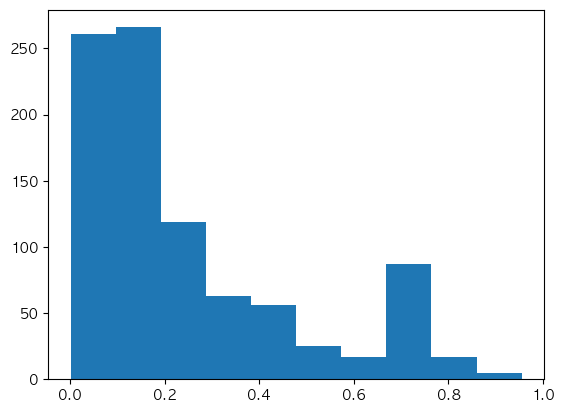

In [57]:
plt.hist(lr.predict_proba(X_test[y_test == 1])[::,1])

In [58]:
y_pred_proba = lr.predict_proba(X_test)[::,1]

In [59]:
auc = roc_auc_score(y_test, y_pred_proba)

In [60]:
model_fpr, model_tpr, threshold1 = roc_curve(y_test, y_pred_proba)

In [61]:
auc

0.7916515390906282

Text(0, 0.5, 'TPR')

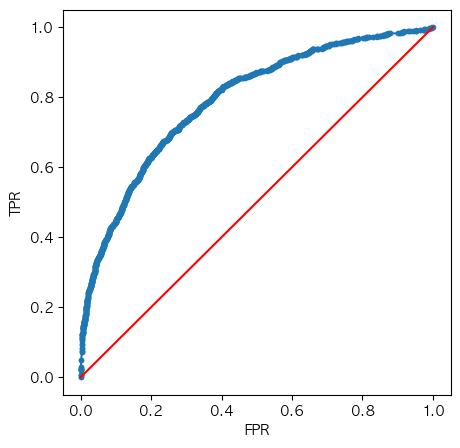

In [62]:
plt.figure(figsize = (5,5))
plt.plot(model_fpr, model_tpr, marker = '.', label = "Logistic")
plt.plot([0, 1], [0, 1], 'red')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [63]:
print(np.sum(y_test))
print(np.sum(y_pred_proba))

916
941.6132506301853


In [64]:
print(np.sum(y))
print(np.sum(lr.predict_proba(X)[::,1]))

4716
4741.6000902125925


In [65]:
df_shot['shot_statsbomb_xg'].sum()

4590.0695984463

In [66]:
lr.predict_proba(X)[::,1]

array([0.07738527, 0.51896259, 0.0302572 , ..., 0.01616283, 0.02630201,
       0.02785237])

In [67]:
np.abs(df_shot['shot_statsbomb_xg'] - lr.predict_proba(X)[::,1]).mean()

0.03852073730050989

In [68]:
df_shot['shot_statsbomb_xg']

0       0.069306
1       0.418073
2       0.032653
3       0.023983
4       0.562398
          ...   
7826    0.248334
7827    0.028587
7828    0.007272
7829    0.025284
7830    0.049658
Name: shot_statsbomb_xg, Length: 45773, dtype: float64

In [69]:
lr.predict_proba(X)[::,1]

array([0.07738527, 0.51896259, 0.0302572 , ..., 0.01616283, 0.02630201,
       0.02785237])

In [70]:
df_shot['shot_statsbomb_xg'] - lr.predict_proba(X)[::,1]

0      -0.008079
1      -0.100890
2       0.002396
3      -0.005301
4      -0.238818
          ...   
7826    0.064069
7827   -0.008924
7828   -0.008890
7829   -0.001018
7830    0.021805
Name: shot_statsbomb_xg, Length: 45773, dtype: float64

Text(0, 0.5, 'xG')

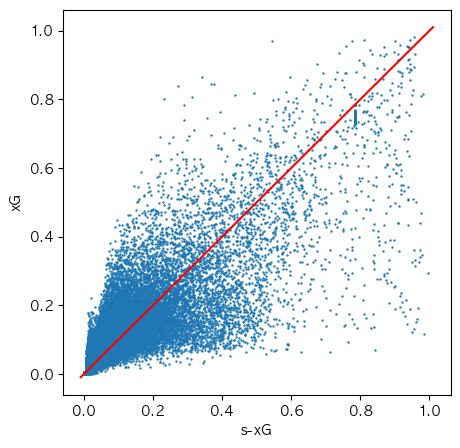

In [71]:
plt.figure(figsize=(5,5 ))
plt.scatter(df_shot['shot_statsbomb_xg'], lr.predict_proba(X)[::,1], s=0.5)
plt.plot([-0.01, 1.01],[-0.01, 1.01], c='red')
plt.xlabel('s-xG')
plt.ylabel('xG')

In [72]:
df_shot['xG_diff'] = np.abs(df_shot['shot_statsbomb_xg'] - lr.predict_proba(X)[::,1])

In [73]:
df_shot.sort_values(by='xG_diff', ascending=False).head(10)

,Unnamed: 0,match_id,id,type_name,sub_type_name,player_name,team_name,body_part_name,outcome_name,x,y,shot_statsbomb_xg,xG_diff
653,2702,3753979,1bd75673-09bb-487e-b4e0-5a7f1a904f23,Shot,Open Play,Jermain Defoe,Sunderland,Left Foot,Goal,105.6,35.7,0.983099,0.865767
6258,2643,3900512,d332e8e2-e5c2-4792-a9d5-7fa7f292fe8d,Shot,Open Play,Souleymane Camara,Montpellier,Left Foot,Goal,110.1,30.5,0.948656,0.827901
317,1411,3890269,ff71d279-5c6d-44e0-8acd-384cf5fad74f,Shot,Open Play,Daniel Ginczek,VfB Stuttgart,Left Foot,Goal,106.1,38.8,0.954949,0.825545
7791,293,3829464,0e8658af-b69d-4a46-ad2f-6b04cdef2299,Shot,Open Play,Alassane Pléa,OGC Nice,Left Foot,Off T,109.3,30.9,0.960538,0.808235
6709,2145,3829413,ed1b2443-d998-4ba9-92f7-68c272792381,Shot,Open Play,Lucas Rodrigues Moura da Silva,Paris Saint-Germain,Right Foot,Goal,109.2,49.4,0.964086,0.805376
7710,2722,3879599,ef3989cc-ddb7-48b6-877d-b2aabaf816b4,Shot,Open Play,Carlos Arturo Bacca Ahumada,AC Milan,Right Foot,Goal,107.8,49.1,0.934561,0.789360
159,3207,3879750,abecf0a8-d220-4b7e-881e-e9776d2b2834,Shot,Open Play,Cristian Tello Herrera,Fiorentina,Left Foot,Goal,108.2,41.4,0.966261,0.775824
6209,3389,3890326,cd6c8573-ca73-4ff4-97f4-5718519f39b8,Shot,Open Play,Stefan Lex,Ingolstadt,Right Foot,Goal,106.2,51.8,0.842449,0.773997
9045,2877,3754307,07de0dbf-caf6-4315-8302-05edf3aeec76,Shot,Open Play,Kelechi Promise Iheanacho,Manchester City,Left Foot,Goal,109.6,31.6,0.929620,0.760733
1703,2319,3754082,4fd97964-597c-4efa-a05a-48c464066884,Shot,Open Play,Romelu Lukaku Menama,Everton,Left Foot,Goal,107.5,35.5,0.943159,0.753467


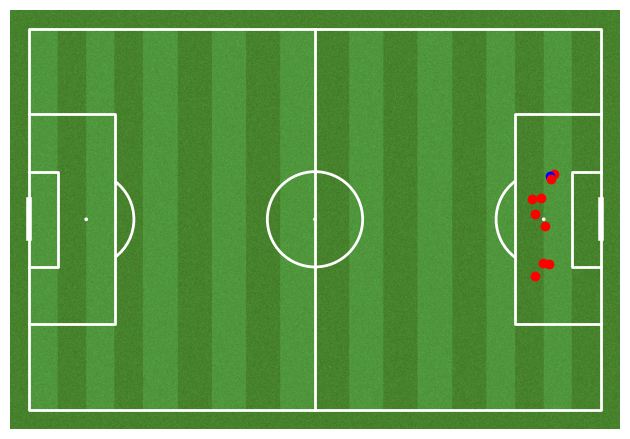

In [74]:
pitch = Pitch(pitch_color='grass', line_zorder=1, line_color='white', pitch_type="statsbomb", stripe=True)
fig, ax = pitch.draw()
t_df_shot = df_shot.sort_values(by='xG_diff', ascending=False).head(10)
for i in range(10):
    if t_df_shot.iloc[i]['outcome_name'] == 'Goal':
        col = 'red'
    else :
        col = 'blue'
    ax.scatter(t_df_shot.iloc[i]['x'], t_df_shot.iloc[i]['y'], color = col)

In [82]:
parser = Sbopen(dataframe=True)
parser.match(16, 2)
parser.competition()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-08-17T23:51:11.837478,None,None,2023-08-17T23:51:11.837478
1,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
2,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
3,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
62,55,43,Europe,UEFA Euro,male,False,True,2020,2023-02-24T21:26:47.128979,2023-04-27T22:38:34.970148,2023-04-27T22:38:34.970148,2023-02-24T21:26:47.128979
63,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2023-06-18T19:28:39.443883,2021-06-13T16:17:31.694,None,2023-06-18T19:28:39.443883
64,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-07-17T21:19:03.032991,2023-07-17T21:21:56.497106,2023-07-17T21:21:56.497106,2023-07-17T21:19:03.032991
65,72,107,International,Women's World Cup,female,False,True,2023,2023-09-01T12:34:19.705316,2023-09-01T12:35:45.762196,2023-09-01T12:35:45.762196,2023-09-01T12:34:19.705316


In [75]:
t_df_shot

,Unnamed: 0,match_id,id,type_name,sub_type_name,player_name,team_name,body_part_name,outcome_name,x,y,shot_statsbomb_xg,xG_diff
653,2702,3753979,1bd75673-09bb-487e-b4e0-5a7f1a904f23,Shot,Open Play,Jermain Defoe,Sunderland,Left Foot,Goal,105.6,35.7,0.983099,0.865767
6258,2643,3900512,d332e8e2-e5c2-4792-a9d5-7fa7f292fe8d,Shot,Open Play,Souleymane Camara,Montpellier,Left Foot,Goal,110.1,30.5,0.948656,0.827901
317,1411,3890269,ff71d279-5c6d-44e0-8acd-384cf5fad74f,Shot,Open Play,Daniel Ginczek,VfB Stuttgart,Left Foot,Goal,106.1,38.8,0.954949,0.825545
7791,293,3829464,0e8658af-b69d-4a46-ad2f-6b04cdef2299,Shot,Open Play,Alassane Pléa,OGC Nice,Left Foot,Off T,109.3,30.9,0.960538,0.808235
6709,2145,3829413,ed1b2443-d998-4ba9-92f7-68c272792381,Shot,Open Play,Lucas Rodrigues Moura da Silva,Paris Saint-Germain,Right Foot,Goal,109.2,49.4,0.964086,0.805376
7710,2722,3879599,ef3989cc-ddb7-48b6-877d-b2aabaf816b4,Shot,Open Play,Carlos Arturo Bacca Ahumada,AC Milan,Right Foot,Goal,107.8,49.1,0.934561,0.789360
159,3207,3879750,abecf0a8-d220-4b7e-881e-e9776d2b2834,Shot,Open Play,Cristian Tello Herrera,Fiorentina,Left Foot,Goal,108.2,41.4,0.966261,0.775824
6209,3389,3890326,cd6c8573-ca73-4ff4-97f4-5718519f39b8,Shot,Open Play,Stefan Lex,Ingolstadt,Right Foot,Goal,106.2,51.8,0.842449,0.773997
9045,2877,3754307,07de0dbf-caf6-4315-8302-05edf3aeec76,Shot,Open Play,Kelechi Promise Iheanacho,Manchester City,Left Foot,Goal,109.6,31.6,0.929620,0.760733
1703,2319,3754082,4fd97964-597c-4efa-a05a-48c464066884,Shot,Open Play,Romelu Lukaku Menama,Everton,Left Foot,Goal,107.5,35.5,0.943159,0.753467


(array([31128.,  9271.,  2542.,  1041.,   560.,   342.,   178.,   604.,
           72.,    35.]),
 array([1.95969283e-05, 9.81314985e-02, 1.96243400e-01, 2.94355302e-01,
        3.92467203e-01, 4.90579105e-01, 5.88691006e-01, 6.86802908e-01,
        7.84914809e-01, 8.83026711e-01, 9.81138613e-01]),
 <BarContainer object of 10 artists>)

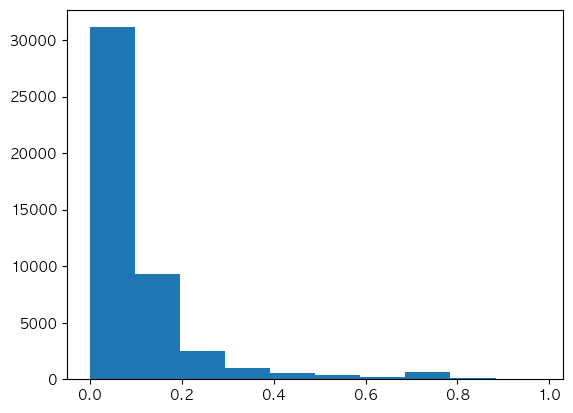

In [90]:
plt.hist(lr.predict_proba(X)[:,1])

In [91]:
df_shot['xG'] = lr.predict_proba(X)[:,1]
df_shot.head()

,Unnamed: 0,match_id,id,type_name,sub_type_name,player_name,team_name,body_part_name,outcome_name,x,y,shot_statsbomb_xg,xG_diff,xG
0,131,18243,129d6ccd-ef7d-44e2-87e1-b55d018f5e24,Shot,Open Play,Jorge Resurrección Merodio,Atlético Madrid,Right Foot,Saved,108.0,52.0,0.069306,0.008079,0.077385
1,159,18243,855d5fee-a32c-4818-b5c8-9c98bb17bac5,Shot,Open Play,Karim Benzema,Real Madrid,Left Foot,Saved,115.0,41.0,0.418073,0.100890,0.518963
2,162,18243,f17c2cb5-cc03-4991-987c-fae2518a21c9,Shot,Open Play,Marcelo Vieira da Silva Júnior,Real Madrid,Left Foot,Off T,96.0,32.0,0.032653,0.002396,0.030257
3,300,18243,158ca4ad-9fd2-4f86-94f9-c711e4b2993f,Shot,Open Play,Toni Kroos,Real Madrid,Left Foot,Blocked,97.0,25.0,0.023983,0.005301,0.029284
4,499,18243,2bf5883e-1d85-4412-b1e9-9f03ff8dafa0,Shot,Open Play,Sergio Ramos García,Real Madrid,Left Foot,Goal,117.0,40.0,0.562398,0.238818,0.801216


In [92]:
df_shot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45773 entries, 0 to 7830
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         45773 non-null  int64  
 1   match_id           45773 non-null  int64  
 2   id                 45773 non-null  object 
 3   type_name          45773 non-null  object 
 4   sub_type_name      45773 non-null  object 
 5   player_name        45773 non-null  object 
 6   team_name          45773 non-null  object 
 7   body_part_name     45773 non-null  object 
 8   outcome_name       45773 non-null  object 
 9   x                  45773 non-null  float64
 10  y                  45773 non-null  float64
 11  shot_statsbomb_xg  45773 non-null  float64
 12  xG_diff            45773 non-null  float64
 13  xG                 45773 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 5.2+ MB


#### Analysis of player xG

In [93]:
import plotly.graph_objs as go
import plotly.express as px

In [329]:
player_shot_df = df_shot.groupby('player_name').count().sort_values(by='id', ascending=False)['id']

##### 100 > attempt

In [355]:
df_shot_filtered = df_shot[df_shot['player_name'].isin(player_shot_df[player_shot_df > 70].index)]

In [356]:
df_shot_filtered.groupby('player_name').mean()['xG'].sort_values(ascending=False)

player_name
Kevin Gameiro                  0.208306
Nikola Kalinić                 0.206634
Pierre-Emerick Aubameyang      0.196862
Karim Benzema                  0.185939
Borja González Tomás           0.184399
                                 ...   
Matt Ritchie                   0.064940
Christian Dannemann Eriksen    0.056717
Yannis Salibur                 0.048259
Rubén Rochina Naixes           0.045564
Tiago Manuel Dias Correia      0.036985
Name: xG, Length: 99, dtype: float64

In [363]:
df_shot_filtered[df_shot_filtered['outcome_name']=='Goal'].groupby(['player_name', 'match_id']).count()['id']

player_name            match_id
Alejandro Darío Gómez  3878559     1
                       3879571     1
                       3879588     1
                       3879632     1
                       3879661     1
                                  ..
Zlatan Ibrahimović     3901216     2
                       3901233     2
                       3901247     1
                       3901253     1
                       3901261     2
Name: id, Length: 1075, dtype: int64

In [357]:
df_shot_filtered[df_shot_filtered['outcome_name']=='Goal'].groupby('player_name').count()['id'] / df_shot_filtered.groupby('player_name').count()['id']

player_name
Alejandro Darío Gómez               0.080460
Aleksandar Mitrović                 0.112500
Alexandre Lacazette                 0.221053
Alexis Alejandro Sánchez Sánchez    0.117117
Andrea Belotti                      0.164384
                                      ...   
Wayne Mark Rooney                   0.112676
Wissam Ben Yedder                   0.180851
Yannis Salibur                      0.089744
Youssef El-Arabi                    0.222222
Zlatan Ibrahimović                  0.243243
Name: id, Length: 99, dtype: float64

In [366]:
df1 = pd.concat([df_shot_filtered.groupby('player_name').mean()['xG'],
           df_shot_filtered[df_shot_filtered['outcome_name']=='Goal'].groupby('player_name').count()['id'] / df_shot_filtered.groupby('player_name').count()['id'],
           df_shot_filtered[df_shot_filtered['outcome_name']=='Goal'].groupby('player_name').count()['id'],
           df_shot_filtered.groupby('player_name').count()['id']],
           axis = 1)
df1.columns = ['xG', 'goal per shot', 'goal', 'shot']

In [367]:
df1.head()

,xG,goal per shot,goal,shot
player_name,,,,
Alejandro Darío Gómez,0.073930,0.080460,7,87
Aleksandar Mitrović,0.147536,0.112500,9,80
Alexandre Lacazette,0.179484,0.221053,21,95
Alexis Alejandro Sánchez Sánchez,0.109368,0.117117,13,111
Andrea Belotti,0.176172,0.164384,12,73


In [368]:
t_df = df1.reset_index()
fig = px.scatter(data_frame=df1.reset_index(), y="xG", x="goal per shot", custom_data='player_name', width=600, height=500)
fig.update_xaxes(range=[0, 0.25])
fig.update_yaxes(range=[0, 0.25])
fig.add_trace(go.Scatter(x=[0,0.5], y=[0,0.5]))
fig.update_layout(showlegend=False)
fig.update_traces(hovertemplate = "player : %{customdata} <br>" + 
                  '<br>' + 
                  'xG : %{y} <br>' + 
                  'G/Shot : %{x}')
fig.show()

In [372]:
t_df = df1.reset_index()
fig = px.scatter(data_frame=df1.reset_index(), y="xG", x="shot", custom_data='player_name', width=600, height=500)
#fig.update_xaxes(range=[0, 0.25])
fig.update_yaxes(range=[0, 0.25])
fig.update_layout(showlegend=False)
fig.update_traces(hovertemplate = "player : %{customdata} <br>" + 
                  '<br>' + 
                  'xG : %{y} <br>' + 
                  'Shot : %{x}')
fig.show()

In [371]:
t_df = df1.reset_index()
fig = px.scatter(data_frame=df1.reset_index(), y="xG", x="goal", custom_data='player_name', width=600, height=500)
#fig.update_xaxes(range=[0, 0.25])
fig.update_yaxes(range=[0, 0.25])
fig.update_layout(showlegend=False)
fig.update_traces(hovertemplate = "player : %{customdata} <br>" + 
                  '<br>' + 
                  'xG : %{y} <br>' + 
                  'goal : %{x}')
fig.show()

In [374]:
t_df = df1.reset_index()
fig = px.scatter(data_frame=df1.reset_index(), y="shot", x="goal", custom_data='player_name', width=600, height=500)
#fig.update_xaxes(range=[0, 0.25])
#fig.update_yaxes(range=[0, 0.25])
fig.update_layout(showlegend=False)
fig.update_traces(hovertemplate = "player : %{customdata} <br>" + 
                  '<br>' + 
                  'shot : %{y} <br>' + 
                  'goal : %{x}')
fig.show()

In [361]:
t_df = df1.reset_index()
t_df['xG margin'] =  t_df['xG'] - t_df['goal per shot']
fig = px.scatter(data_frame=t_df, x="xG margin", y="goal per shot", custom_data='player_name', width=800, height=500, 
                 )
fig.update_xaxes(range=[-0.15, 0.15], title_text='xG margin')
fig.update_yaxes(range=[0, 0.25], title_text='GCR(Goal Conversion Rate)')
fig.add_trace(go.Scatter(x=[0,0], y=[0,0.35]))
fig.update_layout(showlegend=False)
fig.update_traces(hovertemplate = "player : %{customdata} <br>" + 
                  '<br>' + 
                  'xG : %{x:.3f} <br>' + 
                  'G/Shot : %{y:.3f}')
fig.update_layout(hoverlabel_bgcolor="white",
                  hoverlabel_font_size=10,
                  hoverlabel_font_color='black',
                  hoverlabel_font_family="Rockwell")
fig.update_xaxes(showspikes=True, spikecolor="gray", spikesnap="cursor", spikethickness=1)
fig.update_yaxes(showspikes=True, spikecolor="gray", spikethickness=1)
fig.show()